# Statistique Descriptive Bivariée

**Librairies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

On considère dans cette partie une population $\Omega = { \omega_1, \omega_2, \ldots, \omega_n }$ avec $n \geq 3$ et deux caractères numériques $X = [x_1, x_2, \ldots, x_n]$ et $Y = [y_1, y_2, \ldots, y_n].$

La donnée des deux caractères numériques $X$ et $Y$ équivaut à la donnée d’un **caractère vectoriel** Z

$$
Z : \omega_i \mapsto 
\begin{pmatrix}
X(\omega_i) \\
Y(\omega_i)
\end{pmatrix}
=
\begin{pmatrix}
x_i \\
y_i
\end{pmatrix}.
$$

Nous allons analyser graphiquement le lien éventuel entre les valeurs prises par $X$ et celles prises par $Y$.

On suppose aussi :

- Une probabilité uniforme : $\mathbb{P}(\omega_i) = \frac{1}{n}$ pour tout $i$. 

(on peut considérer que chaque individu est équiprobable, c’est-à-dire que chaque individu a la même probabilité d’être choisi au hasard.) 

### Nuage de points

Une première approche graphique consiste à représenter les valeurs de $Y$ en fonction des valeurs de $X$.

On trace alors l'ensemble des points $M_i$ de coordonnées :

$$
M_i = (x_i, y_i)
$$

Ce graphe est appelé **nuage de points** associé aux caractères \$X\$ et \$Y\$.

---

Que permet d’observer un nuage de points ?

* **Concentration** ou **dispersion** des données
* Une **tendance générale** (croissante, décroissante, etc.)
* La présence éventuelle de **valeurs aberrantes** (ou "outliers")

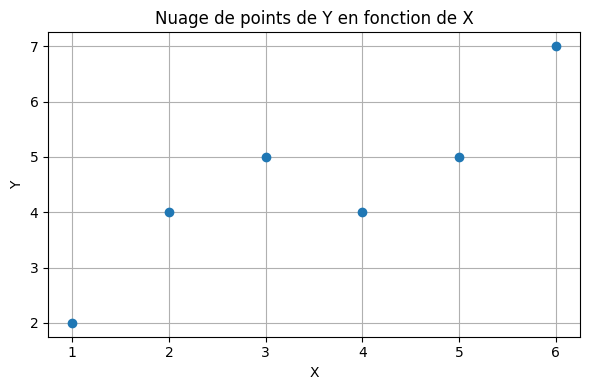

In [4]:
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([2, 4, 5, 4, 5, 7])

# Tracé du nuage de points
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "o")  # changer "o" par "+", ".", etc.
plt.title("Nuage de points de Y en fonction de X")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()

Point moyen d’un nuage de points

Il est défini par :

$$
G = \begin{pmatrix} \overline{x} \\ \overline{y} \end{pmatrix}
$$

C’est-à-dire le point dont les coordonnées sont les moyennes des valeurs de $X$ et de $Y$.

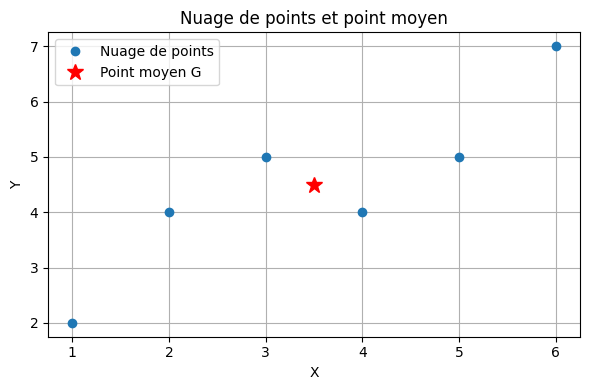

Coordonnées du point moyen G : (3.5, 4.5)


In [5]:
x_moyen = np.mean(X)
y_moyen = np.mean(Y)

# Affichage du nuage de points
plt.figure(figsize=(6, 4))
plt.plot(X, Y, "o", label="Nuage de points")

# Affichage du point moyen
plt.plot(x_moyen, y_moyen, "r*", markersize=12, label="Point moyen G")

# Titres et légendes
plt.title("Nuage de points et point moyen")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coordonnées du point moyen
print("Coordonnées du point moyen G :", (x_moyen, y_moyen))

### Variance et covariance

Soit une population :

$$
\Omega = \{ \omega_1, \omega_2, \ldots, \omega_n \}
$$

munie de la probabilité uniforme :

$$
\forall \omega \in \Omega, \quad \mathbb{P}(\{ \omega \}) = \frac{1}{n}
$$

Une **série statistique** $X$ est une application de $\Omega$ dans $\mathbb{R}$, donc une **variable aléatoire**.

L’**espérance** de $X$ est :

$$
\mathbb{E}(X) = \sum_{i=1}^{n} \frac{1}{n} X(\omega_i) = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

C’est simplement la **moyenne empirique** :

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

---

Variance

La **variance** de $X$ (par rapport à $\mathbb{P}$) est :

$$
V(X) = \sum_{i=1}^{n} \frac{1}{n}(x_i - \bar{x})^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

On note en général l’**écart-type** :

$$
\sigma_n(X) = \sqrt{V(X)}
$$

---

Covariance

La **covariance empirique** de $X$ et $Y$ est définie par :

$$
\text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = \mathbb{E}(XY) - \bar{x} \bar{y}
$$

Pour la commande `cov`, l’option `ddof=0` est **essentielle** si l’on souhaite utiliser la **formule mathématique exacte** donnée précedemment.

En effet, le facteur utilisé devant la somme est :

$$
\frac{1}{n - \text{ddof}}
$$

Par défaut, `ddof = 1`, ce qui correspond à une estimation à partir d’un **échantillon**.
Mais si on veut la formule exacte pour une population, il faut absolument spécifier `ddof = 0`

In [ ]:
X = np.array([5, 7, 3, 9, 6])

# Moyenne
mean_X = np.mean(X)

# Variance sans correction (σ²_n)
var_nc = np.var(X, ddof=0)

print("Moyenne :", mean_X)
print("Variance (ddof=0) :", var_nc)

In [ ]:
X = np.array([5, 7, 3, 9, 6])
Y = np.array([2, 4, 1, 8, 5])

# Covariance entre X et Y sans correction
cov_XY = np.cov(X, Y, ddof=0)

print("Matrice de covariance (ddof=0) :\n", cov_XY)
print("Variance de X :", cov_XY[0, 0])
print("Variance de Y :", cov_XY[1, 1])
print("Covariance entre X et Y :", cov_XY[0, 1])


Covariance X, Y (matrice) :
 [[4.  4.6]
 [4.6 6. ]]
Variance de X : 4.0
Variance de Y : 6.0
Covariance entre X et Y : 4.6000000000000005


In [9]:
df = pd.DataFrame({
    "X": [5, 7, 3, 9, 6],
    "Y": [2, 4, 1, 8, 5]
})

# Variance sans correction
print("Variances (ddof=0) :\n", df.var(ddof=0))

# Covariance sans correction
print("Covariance (ddof=0) :\n", df.cov(ddof=0))

Variances (ddof=0) :
 X    4.0
Y    6.0
dtype: float64
Covariance (ddof=0) :
      X    Y
X  4.0  4.6
Y  4.6  6.0


### Droites de régression

Lorsque les points du nuage statistique semblent **presque alignés**, on suppose qu'il existe des coefficients $a$ et $b$ tels que :

$$
y_i \approx a x_i + b
$$

On appelle :

* $X$ la **variable explicative**
* $Y$ la **variable à expliquer**

L’objectif est de trouver la **droite de régression** $y = ax + b$ qui **minimise les erreurs d’ajustement** :

Somme des carrés des résidus

$$
d^2(a, b) = \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2
$$

On cherche à **minimiser** cette quantité pour trouver les meilleurs coefficients $a$ et $b$.

---

Produit scalaire (interprétation géométrique)

On utilise le produit scalaire défini par :

$$
\langle X, Y \rangle = \frac{1}{n} \sum_{i=1}^n x_i y_i = \mathbb{E}(XY)
$$

La droite de régression est l’élément de l’espace vectoriel engendré par $X$ qui est **le plus proche possible** de $Y$, c’est une **projection orthogonale**.

---

Formules de régression

* **Pente** de la droite :

$$
a = \frac{\text{Cov}(X, Y)}{\text{V}(X)}
$$

* **Ordonnée à l’origine** :

$$
b = \bar{y} - a \bar{x}
$$

Ainsi, l’équation de la droite devient :

$$
y = a x + b
$$

---

Variances et décomposition

On a la relation fondamentale suivante :

$$
\mathbb{V}(Y) = a^2 \mathbb{V}(X) + d^2(a, b)
$$

* Le terme $a^2 \mathbb{V}(X)$ est la **variance expliquée**
* Le terme $d^2(a, b)$ est la **variance résiduelle**

---

Coefficient de corrélation linéaire

Le **coefficient de corrélation** $\rho(X, Y)$ mesure la qualité de l’ajustement :

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_n(X)\sigma_n(Y)}
$$

On vérifie que :

$$
\rho(X, Y)^2 = \frac{a^2 \mathbb{V}(X)}{\mathbb{V}(Y)}
$$

* Si $|\rho| \approx 1$, alors les points sont très bien alignés.
* Si $|\rho| \approx 0$, il n'y a **aucune corrélation linéaire**.

---

### Remarque :

* Le coefficient $\rho$ est **sans unité**.
* Il est compris entre $-1$ et $1$.
* En pratique, une valeur $|\rho| > 0.85$ est souvent jugée comme **bonne**.

